In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pyts.image import GramianAngularField
from fastai.vision.all import *

In [2]:
data = pd.read_csv('C://Users//simon//Documents//aye//data//random_stocks//AAPL.csv', index_col='trade_date', parse_dates=['trade_date'])

In [3]:
data2 = data.drop(['open','high','low','volume','dividend','in_sp500'], axis = 1)
data2 = data2[:-10]

In [4]:
def create_gaf(ts):
    data = dict()
    gadf = GramianAngularField(method='difference', image_size=ts.shape[0])
    data['gadf'] = gadf.fit_transform(pd.DataFrame(ts).T)[0] # ts.T)
    return data

In [5]:
gafs = []
decision = []

for i in range(0,5760,20):
    gafs.append(create_gaf(data2[i:i+20])['gadf'])
    decision.append('Higher' if data2['close'][i+20] > data2['close'][i+19] else 'Lower')

In [6]:
i = 0
for arrays in gafs:
    plt.imshow(arrays, cmap ='inferno')
    plt.axis("off")
    plt.savefig('ims/' + str(i) + '.png', bbox_inches="tight", pad_inches=0)
    plt.close()
    i += 1

In [7]:
import gc

gc.collect()

torch.cuda.empty_cache()

ims = get_image_files('ims')
dls = ImageDataLoaders.from_lists('ims',ims,decision)

# Just trying with resnet. Probably not the best pre-trained model
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.213608,0.676571,0.421053,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.065645,0.799219,0.508772,00:12
1,0.829917,1.050298,0.491228,00:12
2,0.640911,1.132420,0.508772,00:10
3,0.521060,1.147649,0.526316,00:10


In [112]:
torch.cuda.empty_cache()

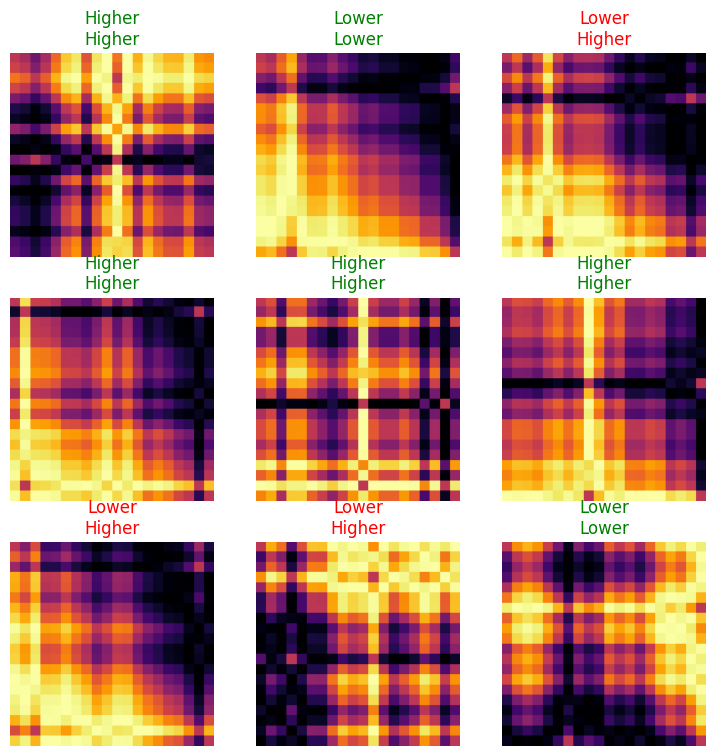

In [108]:
learn.show_results()